In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Checkpoint 1: Data Cleaning 1

# Read rounds2 and companies
rounds2 = pd.read_csv('./data/rounds2.csv', encoding = 'ISO-8859-1')
companies = pd.read_csv('./data/companies.txt', sep = '\t', encoding = 'ISO-8859-1')

# Cleaning data for rounds2
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('utf_8').str.decode('ascii', 'ignore').str.lower().str.strip()

# Cleaning data for companies
companies['permalink'] = companies['permalink'].str.encode('utf-8').str.decode('ascii', 'ignore').str.lower().str.strip()
companies['name'] = companies['name'].str.encode('utf-8').str.decode('ascii', 'ignore').str.strip()

print("\n1.1.1\tHow many unique companies are present in rounds2? = ", rounds2.company_permalink.nunique())
print("\n1.1.2\tHow many unique companies are present in companies? = ", companies.permalink.nunique())

# Find which column can be used as unique key in companies dataset

filter = next(index for index, value in enumerate(companies.describe().loc['unique']) if value == len(companies.index))
unique_key = companies.describe().loc['unique'].iloc[[filter]]

print("\n1.1.3\tIn the companies data frame, which column can be used as the unique key for each company?", 
      "\n\tWrite the name of the column.", "\n\n\tColumn Name =", unique_key.index[0].upper(),
      "\n\n\tThis is because unique count is equal to count of rows in companies data set.")

# Check companies in rounds2 data frame if not present in companies data frame
print("\n1.1.4\tAre there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N")

if len(rounds2.loc[~rounds2['company_permalink'].isin(companies['permalink'])]) == 0:
    print("\n\tAnswer = N")
else:
    print("\n\tAnswer = Y")
    
# Merge rounds2 and companies data frames and name merged frame as master_df

master_df = pd.merge(companies, rounds2, how = 'inner', left_on = 'permalink', right_on = 'company_permalink')
   
print("\n1.1.5\tHow many observations are present in master_frame? =", master_df.shape[0])


1.1.1	How many unique companies are present in rounds2? =  66368

1.1.2	How many unique companies are present in companies? =  66368

1.1.3	In the companies data frame, which column can be used as the unique key for each company? 
	Write the name of the column. 

	Column Name = PERMALINK 

	This is because unique count is equal to count of rows in companies data set.

1.1.4	Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

	Answer = N

1.1.5	How many observations are present in master_frame? = 114949


In [3]:
# Inspecting null values in master data frame
round((master_df.isnull().sum()/len(master_df.index))*100,2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [4]:
# Dropping null values for raised_amount_usd column
master_df.drop(master_df[master_df['raised_amount_usd'].isnull()].index, inplace = True)

# dropping values with 0 raised_amount_usd (no investment can be of 0 value)
master_df.drop(master_df[master_df['raised_amount_usd'] == 0].index, inplace = True)

master_df.shape

(94544, 16)

In [5]:
## Checkpoint 2: Funding Type Analysis

# Average funding of each funding types
average_funding = pd.DataFrame(master_df.groupby("funding_round_type").raised_amount_usd.mean().sort_values(ascending = False))

print("\nAverage funding of each funding types... \n\n", round(average_funding))

print("\n\n2.1.1\tAverage funding amount of venture type? =", round(average_funding.loc['venture'][0]))

print("\n\n2.1.2\tAverage funding amount of angel type? =", round(average_funding.loc['angel'][0]))

print("\n\n2.1.3\tAverage funding amount of seed type? =", round(average_funding.loc['seed'][0]))

print("\n\n2.1.4\tAverage funding amount of private equity type? =", round(average_funding.loc['private_equity'][0]))


average_funding['Decision'] = average_funding.loc[['venture', 'angel', 'seed', 'private_equity']]['raised_amount_usd'].\
      apply(lambda x :np.where(round(x) in range(5000000, 15000000), True, False))

# Find the most suitable investement type
suitable_investment_type = average_funding.loc[average_funding.Decision == True].index[0]

print("\n2.1.5\tConsidering that Spark Funds wants to invest between 5 to 15 million USD per investment round,",
      "\n\twhich investment type is the most suitable for it ? ",
      "\n\n\tMost suitable investment type is :",
      suitable_investment_type.upper())



Average funding of each funding types... 

                        raised_amount_usd
funding_round_type                      
post_ipo_debt                168704572.0
post_ipo_equity               82182494.0
secondary_market              79649630.0
private_equity                73422367.0
undisclosed                   19438972.0
debt_financing                17110102.0
venture                       11755737.0
grant                          4304630.0
convertible_note               1477952.0
product_crowdfunding           1377405.0
angel                           964849.0
seed                            722727.0
equity_crowdfunding             632042.0
non_equity_assistance           428826.0


2.1.1	Average funding amount of venture type? = 11755737.0


2.1.2	Average funding amount of angel type? = 964849.0


2.1.3	Average funding amount of seed type? = 722727.0


2.1.4	Average funding amount of private equity type? = 73422367.0

2.1.5	Considering that Spark Funds wants to invest betwe

In [6]:
## Checkpoint 3: Country Analysis

# Avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Creating top9 data frame
top9 = pd.DataFrame(master_df[master_df['funding_round_type'] == suitable_investment_type].groupby('country_code').
             raised_amount_usd.sum().sort_values(ascending = False)[:9])

print("\nTop nine countries which have received the highest total funding... \n\n", top9)

# 3.1.1 Top English-speaking country

print("\n3.1.1 Top English-speaking country")
print("\tCountry code = USA (United States)")

# 3.1.2 Second English-speaking country
print("\n3.1.2 Second English-speaking country")
print("\tCountry code = GBR (United Kingdom)")

# 3.1.3 Third English-speaking country
print("\n3.1.3 Third English-speaking country")
print("\tCountry code = IND (India)")

# Creating data frame of top 9 countries and chosen funding type
top9_df = master_df[(master_df['country_code'].isin(list(top9.index))) & (master_df['funding_round_type'] == suitable_investment_type)]



Top nine countries which have received the highest total funding... 

               raised_amount_usd
country_code                   
USA             422510842796.00
CHN              39835418773.00
GBR              20245627416.00
IND              14391858718.00
CAN               9583332317.00
FRA               7259536732.00
ISR               6907514579.00
DEU               6346959822.00
JPN               3363676611.00

3.1.1 Top English-speaking country
	Country code = USA (United States)

3.1.2 Second English-speaking country
	Country code = GBR (United Kingdom)

3.1.3 Third English-speaking country
	Country code = IND (India)


In [7]:
## Checkpoint 4: Sector Analysis 1

# Inspecting null values
print(top9_df.isnull().sum())

# Remove rows where category_list has null
top9_df = top9_df[top9_df.category_list.isnull() == False]

# Extract primary sector of each category list
top9_df['primary_sector'] = top9_df['category_list'].str.split('|').str[0]

# Read mapping file
mapping = pd.read_csv('./data/mapping.csv', encoding = 'ISO-8859-1')

# Remove row that has null in category_list
mapping = mapping[mapping.isnull().sum(axis=1) <= 0]

# Melting mapping csv
mapping = pd.melt(mapping, id_vars=['category_list'])

# Filter relevant rows
mapping = mapping[mapping['value'] ==1]

# Drop value column
mapping.drop('value', axis = 1, inplace = True)

# Rename column
mapping.rename(columns={'category_list':'primary_sector', 'variable':'main_sector'}, inplace = True)

# Merge mapping and top9_df
top9_df = pd.merge(top9_df, mapping, how = 'left', on = 'primary_sector')

permalink                      0
name                           0
homepage_url                2070
category_list                261
status                         0
country_code                   0
state_code                   287
region                       449
city                         449
founded_at                  7762
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         19587
funded_at                      0
raised_amount_usd              0
dtype: int64


In [8]:
# Inspecting main sector with null values
top9_df[top9_df['main_sector'].isnull()]

# Imputing values for null values in main sector

# Setting primary sector for analytics as 'Social, Finance, Analytics, Advertising' main_sector
top9_df.loc[top9_df['primary_sector'].str.contains('Analytics', na = False),['main_sector']] = 'Social, Finance, Analytics, Advertising'

# Setting primary sector for finance / financial services as 'Social, Finance, Analytics, Advertising' main_sector
top9_df.loc[top9_df['primary_sector'].str.contains('Finance', na = False),['main_sector']] = 'Social, Finance, Analytics, Advertising'

top9_df.loc[top9_df['primary_sector'].str.contains('Financial', na = False),['main_sector']] = 'Social, Finance, Analytics, Advertising'

# Setting value as others for rest
top9_df.loc[top9_df['main_sector'].isnull(), ['main_sector']] = 'Others'

In [9]:
# Inspecting main sector with null values
len(top9_df[top9_df['main_sector'].isnull()])

0

In [10]:
# Inspecting final top9 data frame
top9_df

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,Media,Entertainment
1,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,Curated Web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,Biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00,Analytics,"Social, Finance, Analytics, Advertising"
5,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,Analytics,"Social, Finance, Analytics, Advertising"
6,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,Apps,"News, Search and Messaging"
7,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.00,Education,Others
8,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.00,Curated Web,"News, Search and Messaging"
9,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,NaN,14-10-2009,265940.00,Curated Web,"News, Search and Messaging"


In [11]:
## Checkpoint 5: Sector Analysis 2

### USA - First country with english as official language

# Creating D1 for USA
D1 = top9_df[(top9_df['country_code'] == 'USA') & ((top9_df['raised_amount_usd'] >= 5000000) & (top9_df['raised_amount_usd'] <= 15000000))]

# Creating D1 - total investment count in each main sector
D1_total_investment_count = pd.DataFrame(D1.groupby('main_sector')['main_sector'].count())

# Renaming column
D1_total_investment_count.rename(columns={"main_sector": "total_investment_count"}, inplace=True)

# Merging total investment count with D1
D1 = pd.merge(D1, D1_total_investment_count, on = 'main_sector')

# Creating D1 - total amount invested in each main_sectors
D1_total_amount_invested = pd.DataFrame(D1.groupby('main_sector')['raised_amount_usd'].sum())

# Renaming column
D1_total_amount_invested.rename(columns={"raised_amount_usd": "total_amount_invested"}, inplace=True)

# Merging total amount invested with D1
D1 = pd.merge(D1, D1_total_amount_invested, on = 'main_sector')

### GBR - Second country with english as official language

# Creating D2 for GBR
D2 = top9_df[(top9_df['country_code'] == 'GBR') & ((top9_df['raised_amount_usd'] >= 5000000) & (top9_df['raised_amount_usd'] <= 15000000))]

# Creating D2 - total investment count in each main sector
D2_total_investment_count = pd.DataFrame(D2.groupby('main_sector')['main_sector'].count())

# Renaming column
D2_total_investment_count.rename(columns={"main_sector": "total_investment_count"}, inplace=True)

# Merging total investment count with D2
D2 = pd.merge(D2, D2_total_investment_count, on = 'main_sector')

# Creating D2 - total amount invested in each main_sectors
D2_total_amount_invested = pd.DataFrame(D2.groupby('main_sector')['raised_amount_usd'].sum())

# Renaming column
D2_total_amount_invested.rename(columns={"raised_amount_usd": "total_amount_invested"}, inplace=True)

# Merging total amount invested with D2
D2 = pd.merge(D2, D2_total_amount_invested, on = 'main_sector')

### IND - Third country with english as official language

# Creating D3 for IND
D3 = top9_df[(top9_df['country_code'] == 'IND') & ((top9_df['raised_amount_usd'] >= 5000000) & (top9_df['raised_amount_usd'] <= 15000000))]

# Creating D3 - total investment count in each main sector
D3_total_investment_count = pd.DataFrame(D3.groupby('main_sector')['main_sector'].count())

# Renaming column
D3_total_investment_count.rename(columns={"main_sector": "total_investment_count"}, inplace=True)

# Merging total investment count with D3
D3 = pd.merge(D3, D3_total_investment_count, on = 'main_sector')

# Creating D3 - total amount invested in each main_sectors
D3_total_amount_invested = pd.DataFrame(D3.groupby('main_sector')['raised_amount_usd'].sum())

# Renaming column
D3_total_amount_invested.rename(columns={"raised_amount_usd": "total_amount_invested"}, inplace=True)

# Merging total amount invested with D3
D3 = pd.merge(D3, D3_total_amount_invested, on = 'main_sector')

In [12]:
## Create an empty data frame to store questions and answers.
col_names =  ['Questions', 
              'USA',
              'GBR', 
              'IND'
             ]

table5_df = pd.DataFrame(columns = col_names)

## 1. Total number of investments (count)
data = {col_names[0]: "5.1. Total number of investments (count)",
        col_names[1]: D1_total_investment_count['total_investment_count'].sum(),
        col_names[2]: D2_total_investment_count['total_investment_count'].sum(),
        col_names[3]: D3_total_investment_count['total_investment_count'].sum()
       }

table5_df.loc[len(table5_df)] = data 

## 2. Total amount of investment (USD)
data = {col_names[0]: "5.2. Total amount of investment (USD)",
        col_names[1]: D1_total_amount_invested['total_amount_invested'].sum(),
        col_names[2]: D2_total_amount_invested['total_amount_invested'].sum(),
        col_names[3]: D3_total_amount_invested['total_amount_invested'].sum()
       }

table5_df.loc[len(table5_df)] = data 

## Sort sector wise investments count
D1_total_investment_count.sort_values(by=['total_investment_count'], ascending=False, inplace=True)
D2_total_investment_count.sort_values(by=['total_investment_count'], ascending=False, inplace=True)
D3_total_investment_count.sort_values(by=['total_investment_count'], ascending=False, inplace=True)

## 3. Top sector (based on count of investments)
data = {col_names[0]: "5.3. Top sector (based on count of investments)",
        col_names[1]: D1_total_investment_count.iloc[0].name,
        col_names[2]: D2_total_investment_count.iloc[0].name,
        col_names[3]: D3_total_investment_count.iloc[0].name
       }

table5_df.loc[len(table5_df)] = data 

## 4. Second-best sector (based on count of investments)
data = {col_names[0]: "5.4. Second-best sector (based on count of investments)",
        col_names[1]: D1_total_investment_count.iloc[1].name,
        col_names[2]: D2_total_investment_count.iloc[1].name,
        col_names[3]: D3_total_investment_count.iloc[1].name
       }
table5_df.loc[len(table5_df)] = data

## 5. Third-best sector (based on count of investments)
data = {col_names[0]: "5.5. Third-best sector (based on count of investments)",
        col_names[1]: D1_total_investment_count.iloc[2].name,
        col_names[2]: D2_total_investment_count.iloc[2].name,
        col_names[3]: D3_total_investment_count.iloc[2].name
       }

table5_df.loc[len(table5_df)] = data

## 6. Number of investments in the top sector (refer to point 5.3)
data = {col_names[0]: "5.6. Number of investments in the top sector (refer to point 5.3)",
        col_names[1]: D1_total_investment_count.iloc[0].values[0],
        col_names[2]: D2_total_investment_count.iloc[0].values[0],
        col_names[3]: D3_total_investment_count.iloc[0].values[0]
       }
table5_df.loc[len(table5_df)] = data

## 7. Number of investments in the second-best sector (refer to point 5.4)
data = {col_names[0]: "5.7. Number of investments in the second-best sector (refer to point 5.4)",
        col_names[1]: D1_total_investment_count.iloc[1].values[0],
        col_names[2]: D2_total_investment_count.iloc[1].values[0],
        col_names[3]: D3_total_investment_count.iloc[1].values[0]
       }
table5_df.loc[len(table5_df)] = data

## 8. Number of investments in the third-best sector (refer to point 5.5)
data = {col_names[0]: "5.8. Number of investments in the third-best sector (refer to point 5.5)",
        col_names[1]: D1_total_investment_count.iloc[2].values[0],
        col_names[2]: D2_total_investment_count.iloc[2].values[0],
        col_names[3]: D3_total_investment_count.iloc[2].values[0]
       }
table5_df.loc[len(table5_df)] = data

## 9. For the top sector count-wise (point 3), which company received the highest investment?

D1_top_Sector = pd.DataFrame(D1.loc[D1.main_sector == D1_total_investment_count.iloc[0].name])
D2_top_Sector = pd.DataFrame(D2.loc[D2.main_sector == D2_total_investment_count.iloc[0].name])
D3_top_Sector = pd.DataFrame(D3.loc[D3.main_sector == D3_total_investment_count.iloc[0].name])

# Sort based on raised amount usd in D1, D2 and D3
D1_top_Sector.sort_values(by=['raised_amount_usd'], ascending=False, inplace=True)
D2_top_Sector.sort_values(by=['raised_amount_usd'], ascending=False, inplace=True)
D3_top_Sector.sort_values(by=['raised_amount_usd'], ascending=False, inplace=True)

data = {col_names[0]: "5.9. For the top sector count-wise (point 3), which company received the highest investment?",
        col_names[1]: D1_top_Sector.name.iloc[0],
        col_names[2]: D2_top_Sector.name.iloc[0],
        col_names[3]: D3_top_Sector.name.iloc[0]
       }
table5_df.loc[len(table5_df)] = data

## 10. For the second-best sector count-wise (point 4), which company received the highest investment?

D1_2nd_Sector = pd.DataFrame(D1.loc[D1.main_sector == D1_total_investment_count.iloc[1].name])
D2_2nd_Sector = pd.DataFrame(D2.loc[D2.main_sector == D1_total_investment_count.iloc[1].name])
D3_2nd_Sector = pd.DataFrame(D3.loc[D3.main_sector == D1_total_investment_count.iloc[1].name])

# Sort based on raised amount usd in D1, D2 and D3
D1_2nd_Sector.sort_values(by=['raised_amount_usd'], ascending=False, inplace=True)
D2_2nd_Sector.sort_values(by=['raised_amount_usd'], ascending=False, inplace=True)
D3_2nd_Sector.sort_values(by=['raised_amount_usd'], ascending=False, inplace=True)

data = {col_names[0]: "5.10. For the second-best sector count-wise (point 4), which company received the highest investment?",
        col_names[1]: D1_2nd_Sector.name.iloc[0],
        col_names[2]: D2_2nd_Sector.name.iloc[0],
        col_names[3]: D3_2nd_Sector.name.iloc[0]
       }
table5_df.loc[len(table5_df)] = data

## Print the table for displaying the results.
print("\t\t\t\t\tTable 5.1 : Sector-wise Investment Analysis")

table5_df

					Table 5.1 : Sector-wise Investment Analysis


,Questions,USA,GBR,IND
0,5.1. Total number of investments (count),12064,621,328
1,5.2. Total amount of investment (USD),107766584223.00,5379078691.00,2949543602.00
2,5.3. Top sector (based on count of investments),Others,Others,Others
3,5.4. Second-best sector (based on count of inv...,"Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising"
4,5.5. Third-best sector (based on count of inve...,Cleantech / Semiconductors,Cleantech / Semiconductors,"News, Search and Messaging"
5,5.6. Number of investments in the top sector (...,3077,155,110
6,5.7. Number of investments in the second-best ...,2673,130,60
7,5.8. Number of investments in the third-best s...,2297,127,52
8,"5.9. For the top sector count-wise (point 3), ...",Cima NanoTech,Tribold,LimeRoad
9,5.10. For the second-best sector count-wise (p...,CloudPhysics,myThings,Financial Information Network & Operations Pvt



6.1.	A plot showing the fraction of total investments (globally) in venture, seed, and private equity  
	and the average amount of investment in each funding type. This chart should make it clear that  
	a certain funding type (FT) is best suited for Spark Funds.




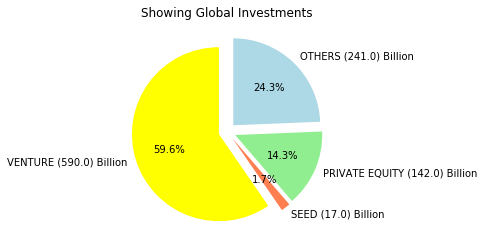


From above pie chart, it is very clear that : VENTURE : funding is the most suitable investment for Spark Funds.



6.2.	A plot showing the top 9 countries against the total amount of investments of funding type : VENTURE 
	This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.




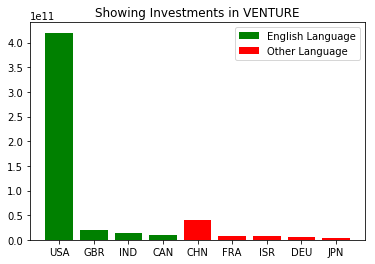


From the above chart it is very clear that USA, GBR and IND are the top 3 countries investing in : VENTURE



6.3.	A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart
 	(for the chosen investment type : VENTURE ). 
	This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.




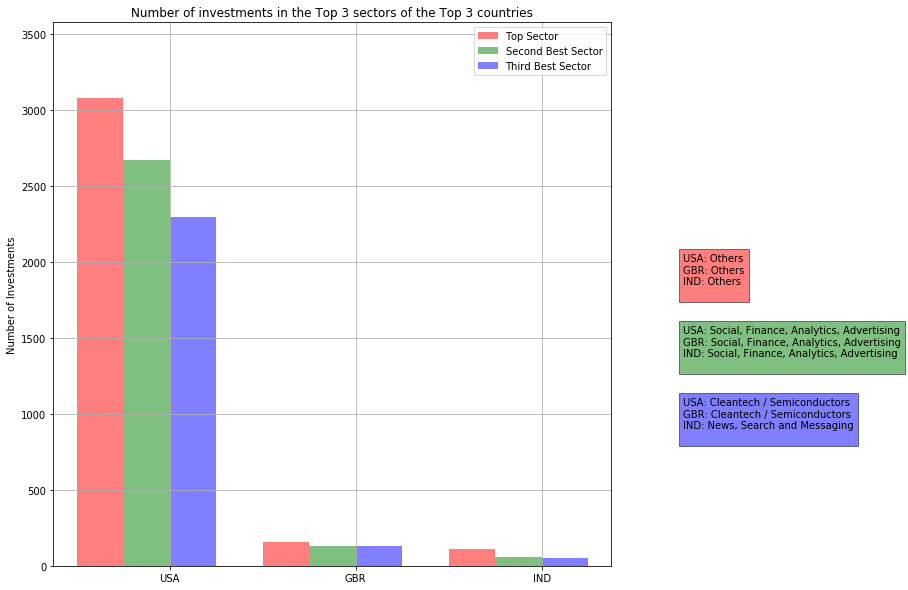

In [13]:
## Checkpoint 6: Plots

print("\n6.1.\tA plot showing the fraction of total investments (globally) in venture, seed, and private equity ",
      "\n\tand the average amount of investment in each funding type. This chart should make it clear that ",
      "\n\ta certain funding type (FT) is best suited for Spark Funds.\n\n")
      
# Aggregate the investment amount raised globally based on funding type and save it as dataframe
df_sum = pd.DataFrame(master_df.groupby('funding_round_type')['raised_amount_usd'].sum())

df_sum

# Add the venture,seed,private_equity investment amount and subtract it from total 
venture_fund = df_sum.loc['venture'][0]
seed_fund = df_sum.loc['seed'][0]
private_equity_fund = df_sum.loc['private_equity'][0]
all_other_fund = df_sum.sum() - (venture_fund + seed_fund + private_equity_fund)

# Data's to plot
chart_label_funds = ["VENTURE (" + str(round(venture_fund/1000000000)) + ') Billion',
                     "SEED (" + str(round(seed_fund/1000000000)) + ') Billion',
                     "PRIVATE EQUITY (" + str(round(private_equity_fund/1000000000)) + ') Billion',
                     "OTHERS (" + str(round(all_other_fund[0]/1000000000)) + ') Billion']

total_amounts = [venture_fund, seed_fund, private_equity_fund, all_other_fund[0]]
colors = ['yellow', 'coral', 'lightgreen', 'lightblue']
explode = (0.1, 0.1, 0.1, 0.1)

# Plot
plt.pie(total_amounts, explode=explode, labels=chart_label_funds, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Showing Global Investments')
plt.show()

print("\nFrom above pie chart, it is very clear that :", suitable_investment_type.upper(), 
      ": funding is the most suitable investment for Spark Funds.")

# Create a bar graph which clearly shows top english speaking countries and top non english countries
#sns.set_style("darkgrid")

print("\n\n\n6.2.\tA plot showing the top 9 countries against the total amount of investments of funding type :",
      suitable_investment_type.upper(),
      "\n\tThis should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.\n\n")

eng_list = ['USA','GBR','IND','CAN']

# data to plot
eng_countries_data = top9_df[top9_df.country_code.isin(eng_list)].groupby('country_code')
eng_countries_amounts = pd.DataFrame(eng_countries_data['raised_amount_usd'].sum().sort_values(ascending = False))

non_eng_countries_data = top9_df[~top9_df.country_code.isin(eng_list)].groupby('country_code')
non_eng_countries_amounts = pd.DataFrame(non_eng_countries_data['raised_amount_usd'].sum().sort_values(ascending = False))

plt.bar(eng_countries_amounts.index.values, round(eng_countries_amounts['raised_amount_usd']), color='g')
plt.bar(non_eng_countries_amounts.index.values, round(non_eng_countries_amounts['raised_amount_usd']), color='r')
plt.legend([('English Language'), ('Other Language')])
plt.title('Showing Investments in VENTURE')
plt.show()

print("\nFrom the above chart it is very clear that USA, GBR and IND are the top 3 countries investing in :"
      , suitable_investment_type.upper())

# Create a plot to show the number of investments in the top 3 sectors of the top 3 countries
print("\n\n\n6.3.\tA plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart\n", 
      "\t(for the chosen investment type :", suitable_investment_type.upper(),").",
      "\n\tThis plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.\n\n")

# Create a grouped bar chart dataframe
data_grpbar_chart = {'country_code': table5_df.columns[1:],
                     'top_sector': table5_df.iloc[5][1:4],
                     'second_sector': table5_df.iloc[6][1:4],
                     'third_sector': table5_df.iloc[7][1:4]}
group_bar_chart_df = pd.DataFrame(data_grpbar_chart, columns = ['country_code', 'top_sector', 'second_sector', 'third_sector'])

# Setting the positions and width for the bars
pos=list(range(len(group_bar_chart_df['top_sector'])))
width = 0.25
    
# Plotting the bars
figure, axis = plt.subplots(figsize=(10,10))

# Create a bar with top_sector data, in position pos,
bar1 = plt.bar(pos, group_bar_chart_df['top_sector'], width, alpha=0.5, color='r') 

# Create a bar with second_sector data, in position pos + some width buffer,
bar2 = plt.bar([p + width for p in pos], group_bar_chart_df['second_sector'], width, alpha=0.5, color='g') 

# Create a bar with third_sector data, in position pos + some width buffer,
bar3 = plt.bar([p + width*2 for p in pos], group_bar_chart_df['third_sector'], width, alpha=0.5, color='b') 

# Set the y axis label
axis.set_ylabel('Number of Investments')

# Set the chart's title
axis.set_title('Number of investments in the Top 3 sectors of the Top 3 countries')

# Set the position of the x ticks
axis.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
axis.set_xticklabels(group_bar_chart_df['country_code'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*3)
plt.ylim([0, 500 + max(max(group_bar_chart_df['top_sector']), 
                        max(group_bar_chart_df['second_sector']), 
                        max(group_bar_chart_df['third_sector']))])

# Adding the legend and showing the plot
plt.legend(['Top Sector', 'Second Best Sector', 'Third Best Sector'], loc='upper right')
plt.figtext(1, 0.5,\
            table5_df.iloc[2][1:4].index[0] + ": "+ table5_df.iloc[2][1:4][0] + "\n"\
            + table5_df.iloc[2][1:4].index[1] + ": "+ table5_df.iloc[2][1:4][1] + "\n"\
            + table5_df.iloc[2][1:4].index[2] + ": "+ table5_df.iloc[2][1:4][2] + "\n", 
            ha="left", fontsize=10, bbox={"facecolor":"r", "alpha":0.5, "pad":4})
plt.figtext(1, 0.4,\
            table5_df.iloc[3][1:4].index[0] + ": "+ table5_df.iloc[3][1:4][0] + "\n"\
            + table5_df.iloc[3][1:4].index[1] + ": "+ table5_df.iloc[3][1:4][1] + "\n"\
            + table5_df.iloc[3][1:4].index[2] + ": "+ table5_df.iloc[3][1:4][2] + "\n", 
            ha="left", fontsize=10, bbox={"facecolor":"g", "alpha":0.5, "pad":4})
plt.figtext(1, 0.3,\
            table5_df.iloc[4][1:4].index[0] + ": "+ table5_df.iloc[4][1:4][0] + "\n"\
            + table5_df.iloc[4][1:4].index[1] + ": "+ table5_df.iloc[4][1:4][1] + "\n"\
            + table5_df.iloc[4][1:4].index[2] + ": "+ table5_df.iloc[4][1:4][2] + "\n", 
            ha="left", fontsize=10, bbox={"facecolor":"b", "alpha":0.5, "pad":4})
plt.grid()
plt.show()